In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning

* Supervised
* Unsupervised
* Regularisating effect and importance of training data

# Supervised learning

Given samples of noisy images $\{f^\delta_i\}_{i=1}^n$ and corresponding ground truths $\{u_i\}_{i=1}^n$, find a function such that $$F(f_i^\delta) \approx u_i.$$

* A popular way to parametrise such a function is by a neural network
* Any of the filters we learned about can be used as well; $$F(f^\delta) = \text{arg}\min_u \|Ku - f^\delta\|_2^2 + \|Ru\|_p^p.$$
* Can be used to solve the inverse problem directly, or as part of iterative scheme (denoising step)

# Exercise

We consider an inverse problem with forward operator $K$ and data
$$f = Ku + \epsilon,$$

where $u$ is generated by sampling from some distribution. To solve it, we train an affine network 

$$F(f) = Wf + c.$$

The coefficients $(W,c)$ are found by solving

$$\min_{W,c} \sum_i\|Wf_i + c - u_i\|_2^2.$$

* Under Gaussian assumptions $u\sim N(\mu,\Sigma)$ and $\epsilon \sim N(0,\sigma^2)$ we can express the ideal $W$ and $c$ ; what are they?
* Investigate how well this "network" performs; look at the error on the training data and a separate test dataset
* The coefficients for a given finite dataset also allows for a closed-form expression; what is it?
* Investigate how this network performs as you vary the number of training samples
* What happens if you draw your prior samples mainly along the null-space of $K$?
* For stability of the network we can simply look at the singular values of $W$; what do you notice?
* Generate a more complex training data set; e.g. by drawing $u$ from a different distribution. How does it perform now? When do you think you'll need a more complex network?


In [45]:
K = np.array([[2,1],[1,2]])
def get_data(n, sigma):
    u = np.random.randn(2,n)
    f = K@u + sigma*np.random.randn(2,n)
    return u,f

sigma = 1e-1
u_train,f_train = get_data(100,sigma)

In [46]:
W = np.array([[0.6,-0.3],[-0.3,0.6]])
c = np.array([0,0])

u_pred = W@f_train
f_pred = K@u_pred

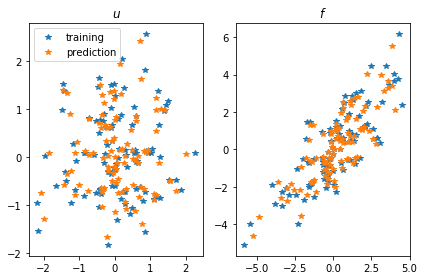

In [47]:
fig,ax = plt.subplots(1,2)

ax[0].plot(u_train[0],u_train[1],'*',label='training')
ax[0].plot(u_pred[0],u_pred[1],'*',label='prediction')

ax[0].set_title('$u$')

ax[1].plot(f_train[0],f_train[1],'*')
ax[1].plot(f_pred[0],f_pred[1],'*')

ax[1].set_title('$f$')

ax[0].legend()
fig.tight_layout()

# Unsupervised learning

Given samples $\{u_i\}_{i=1}^n$, extract information that is usefull for describing / summarising the training set.


* Learn a probability distribution (e.g., $\mu$ and $\Sigma$ such that $u_i \sim N(\mu,\Sigma)$) (to be used as prior)
* Learn to represent samples in a simple fashion $u_i \approx F(u_i)$ (to be used as denoiser in iterative method).

#  Regularisating effect and importance of training data

> We must not ask our supervised approach to map similar data to different results